<a href="https://colab.research.google.com/github/753x/StudyLibrary/blob/main/DeepLearning/Chapter5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5.1 계산 그래프**

**계산 그래프** : 계산 과정을 그래프로 나타낸 것

**그래프** : 복수의 **노드**와 **에지**로 표현

---

## 5.1.1 계산 그래프로 풀다

 **문제 1 : 현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이때 지불 금액을 구하세요. 단, 소비세가 10% 부과됩니다.**

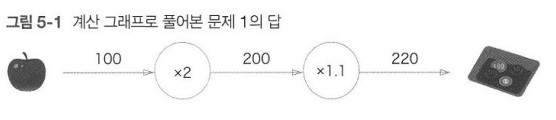






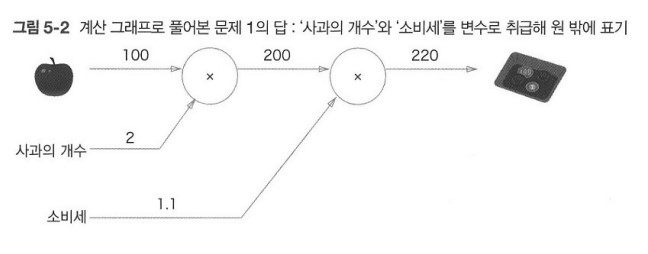

**문제 2 : 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개 150원 입니다. 소비세가 10%일 때 지불 금액을 구하세요.**

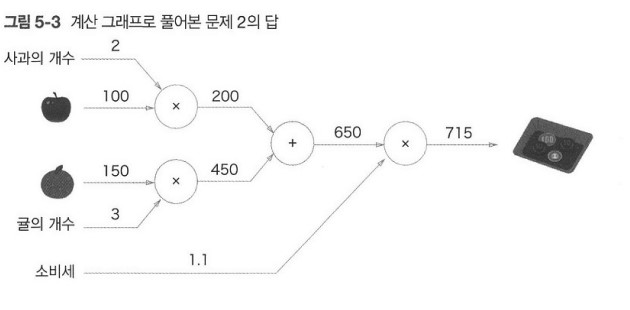

**계산 그래프를 이용한 문제풀이**

1. 계산 그래프를 구성한다.

2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다.



## 5.1.2 국소적 계산

**계산 그래프의 특징**

> '국소적 계산'을 전파함으로써 최종 결과를 얻는다.





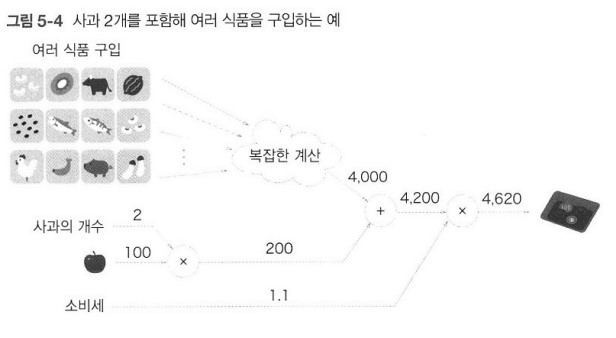

## 5.1.3 왜 계산 그래프로 푸는가?

**계산 그래프의 이점**


> '국소적 계산'을 통해 전체가 복잡해도 노드에서는 단순한 계산에 집중해 문제를 단순화 가능

> 중간 계산 결과를 모두 보관할 수 있음

> 역전파를 통해 '미분'을 효율적으로 계산할 수 있음









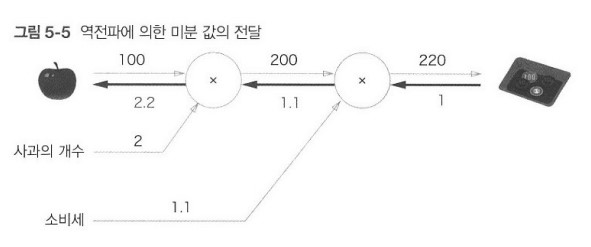

# **5.2 연쇄법칙**

**역전파** : '국소적인 미분'을 순방향과는 반대인 오른쪽에서 왼쪽으로 전달

## 5.2.1 계산 그래프의 역전파

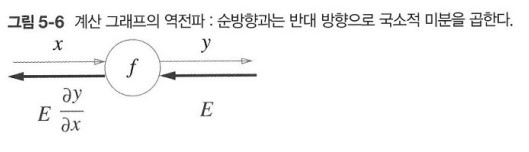

## 5.2.2 연쇄법칙이란?

> **합성 함수** : 여러 함수로 구성된 함수

> **z = (x+y)^2**

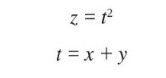

**연쇄법칙** : 합성 함수의 미분에 대한 성질

*합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.*

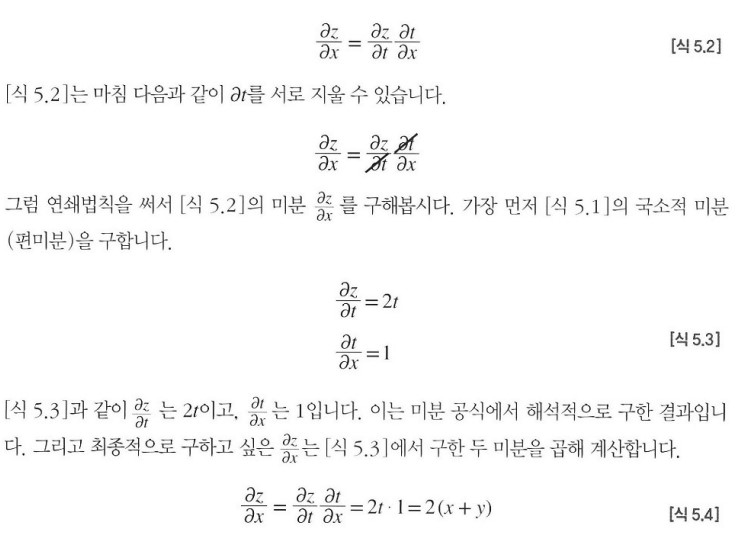

## 5.2.3 연쇄법칙과 계산 그래프

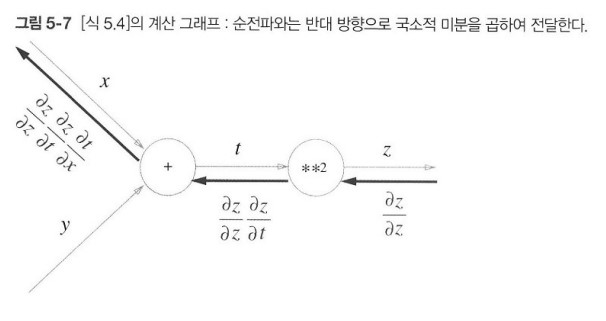

> **입력** : dz/dz = 1

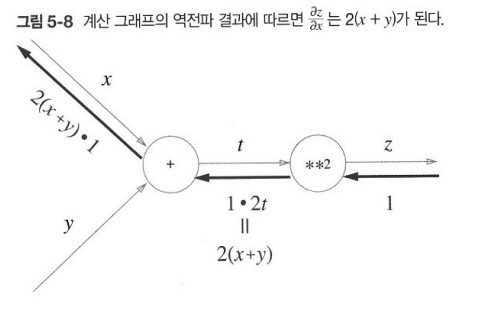

# **5.4 단순한 계층 구현하기**

In [ ]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y

    return out

  def backward(self, dout):
    dx = dout * self.y # x와 y를 바꾼다.
    dy = dout * self.x

    return dx, dy

In [ ]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price) # 220

220.00000000000003


In [ ]:
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax) # 2.2 110 200

2.2 110.00000000000001 200


In [ ]:
class AddLayer:
  def __init__(self):
    pass

  def forward(self, x, y):
    out = x + y
    return out

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy

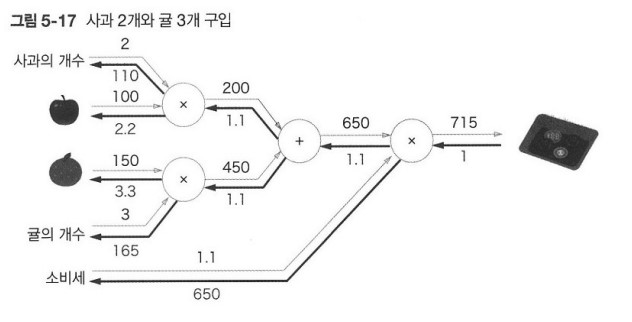

In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num) #(1)
orange_price = mul_orange_layer.forward(orange, orange_num) #(2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #(3)
price = mul_tax_layer.forward(all_price, tax) #(4)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #(4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) #(3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price) #(2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #(1)

print(price) # 715
print(dapple_num, dapple, dorange, dorange_num, dtax) # 110 2.2 3.3 165 650

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


# **5.5 활성화 함수 계층 구현하기**

## 5.5.1 ReLU 계층

> 활성화 함수로 사용되는 ReLU의 수식

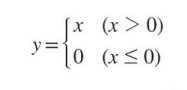

> x에 대한 y의 미분

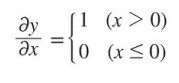

x > 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘림

x <= 0이면 역전파는 하류로 신호를 보내지 않음(0을 보냄)

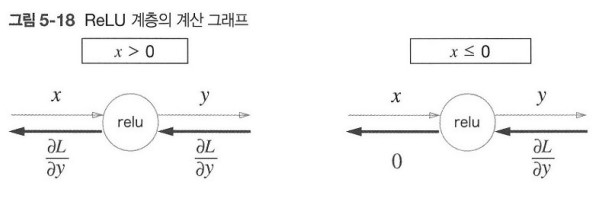

In [ ]:
class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx

In [ ]:
import numpy as np

x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [ ]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


In [ ]:
class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1/(1 + np.exp(-x))
    self.out = out

    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out

    return dx